# EMD algorithm - Clustering experiments

## Maria Inês Silva
## 02/02/2019

***

## Data and library imports

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import dtw_clustering as clust
import uah_utils as utils
import clusterviz as cviz

In [2]:
def transform_motif_dic_list_to_df(motif_dic_list):
    motif_df = pd.DataFrame(motif_dic_list)
    motif_df['n_members'] = motif_df['members_ts_pointers'].apply(lambda x: len(x))
    motif_df['pattern_len'] = motif_df['pattern'].apply(lambda x: len(x))
    motif_df = motif_df[['pattern', 'pattern_len', 'n_members', 'mdl_cost', 'mean_dist',  'n_brakes', 'n_turns', 'n_accelerations', 'dispersion', 'event_label']]
    return motif_df

In [3]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))

In [4]:
trip_df = pd.read_pickle(os.path.join(data_folder, 'trip_df.pkl'))
ts = trip_df['az'].values
events_ts = trip_df['event_type'].values
motif_dic_list = pickle.load(open(os.path.join(output_folder, 'motif_lon_acc_trip_exp4.p'), 'rb'))
center_dist_mat = np.load(os.path.join(output_folder, 'dist_lon_acc_trip_exp4.npy'))

## Clustering of motif's centers 

In [5]:
len(motif_dic_list)

2814

The pyclustering core is not supported for platform 'darwin' (64bit).
Please, contact to 'pyclustering@yandex.ru'.


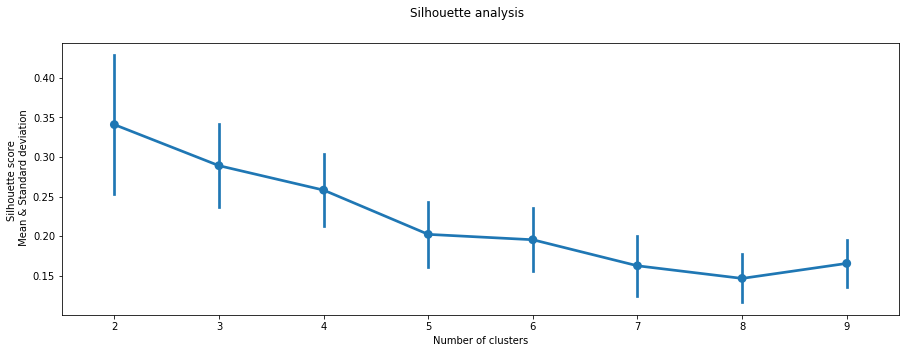

In [6]:
k_list = list(range(2, 10))
n_runs = 20
kmedoids_scores_df = clust.run_kmedoids_evaluation(center_dist_mat, k_list, n_runs)

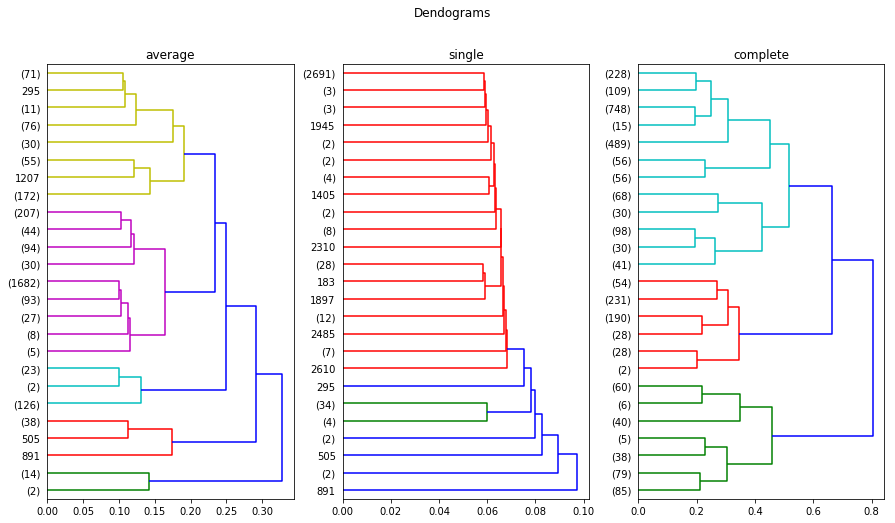

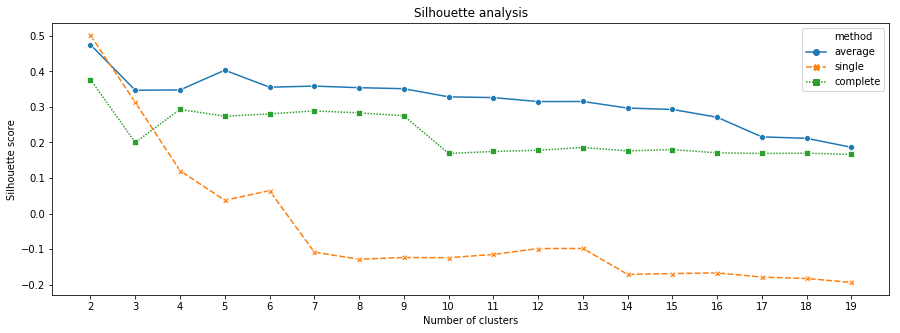

In [23]:
agglomerative_scores_df = clust.run_agglomerative_evaluation(center_dist_mat,  k_list)

In [27]:
cluster_labels, score = clust.fit_agglomerative_model(center_dist_mat, k=5, method='average')

In [28]:
motif_event_dic_list = utils.add_event_partition_to_motif(motif_dic_list, events_ts)
motif_df = transform_motif_dic_list_to_df(motif_event_dic_list).assign(cluster_label=cluster_labels)
motif_df.head()

,pattern,pattern_len,n_members,mdl_cost,mean_dist,n_brakes,n_turns,n_accelerations,dispersion,event_label,cluster_label
0,[dfd],1,3,96435.38,0.04,0,0,0,0.00,0,4
1,[ddb],1,16,73650.95,0.05,0,0,0,0.00,0,5
2,[dff],1,24,66438.80,0.05,0,2,1,0.82,2,4
3,[cbd],1,4,85450.96,0.04,0,0,0,0.00,0,4
4,[gfd],1,8,78698.79,0.05,0,0,0,0.00,0,4


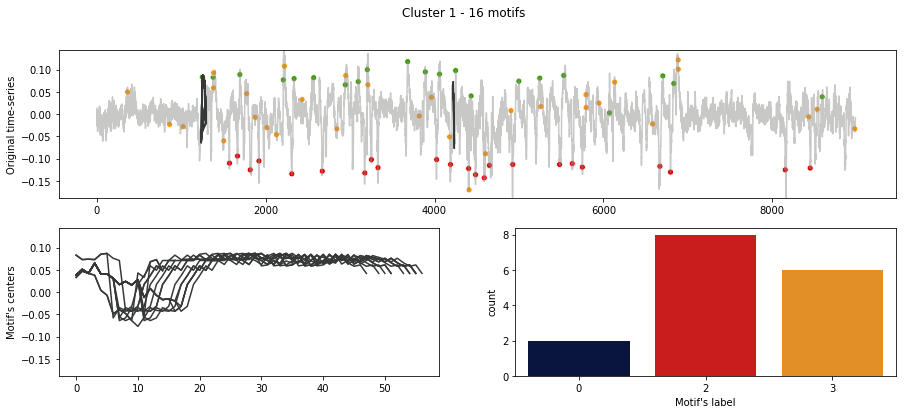

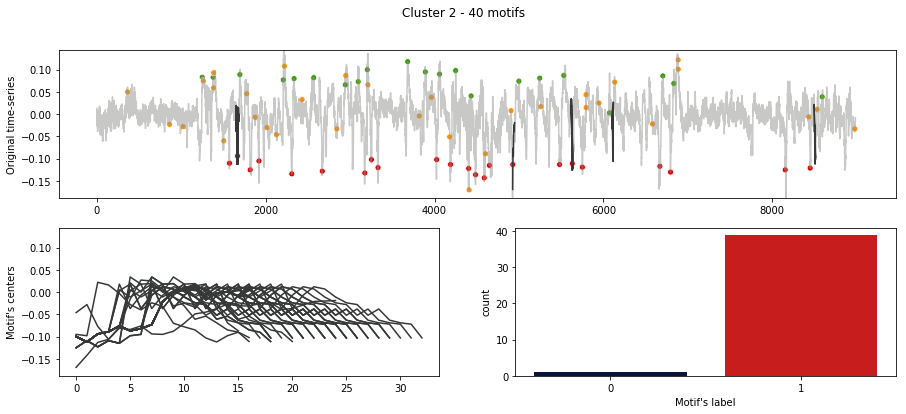

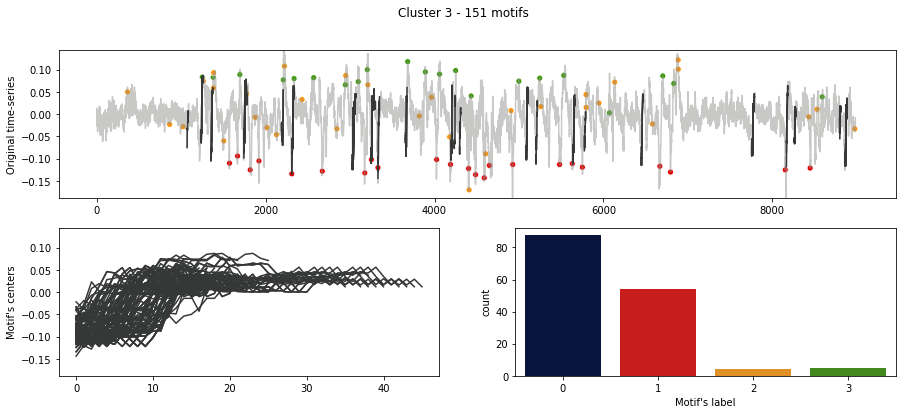

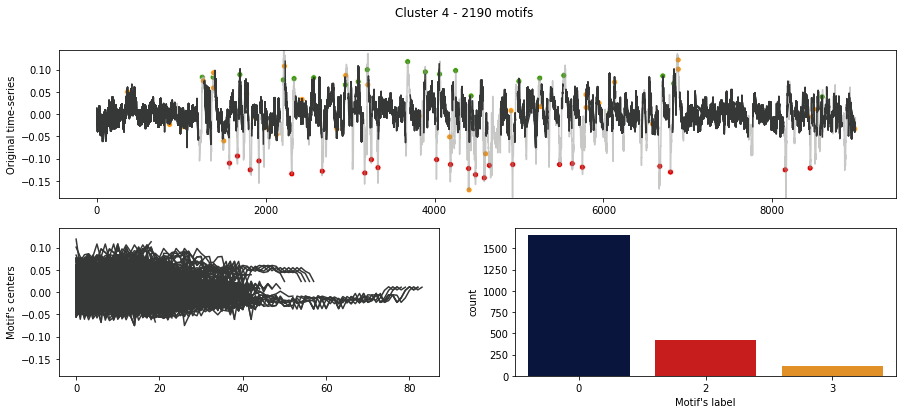

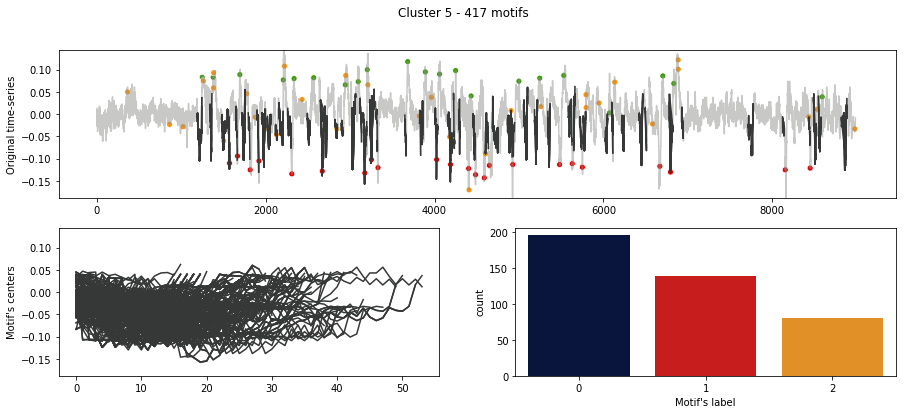

In [29]:
cviz.plot_motif_clusters(ts, events_ts, motif_event_dic_list, cluster_labels)

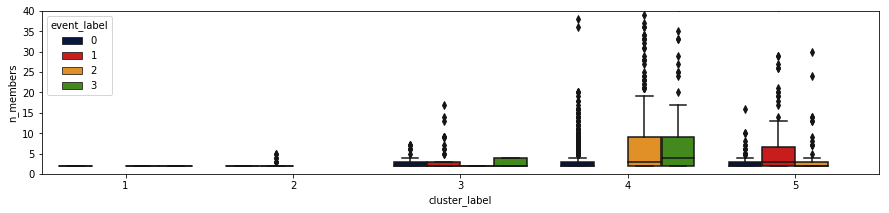

In [17]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="n_members", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.ylim(0, 40)
plt.show()

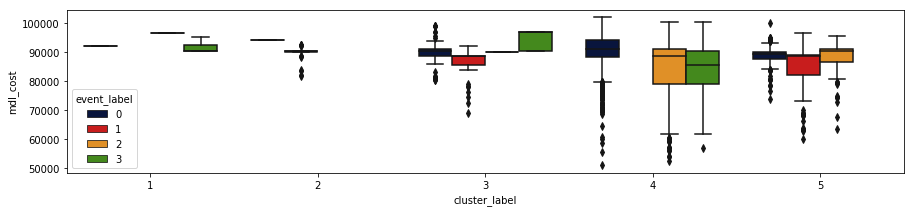

In [12]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="mdl_cost", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

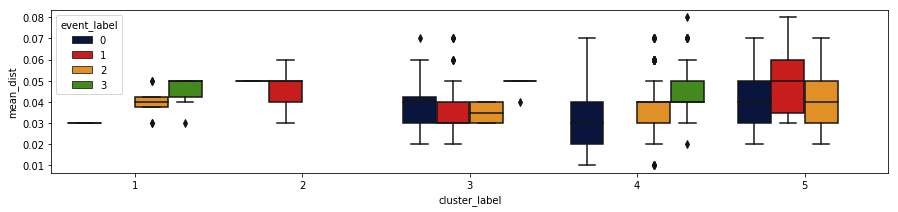

In [13]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="mean_dist", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

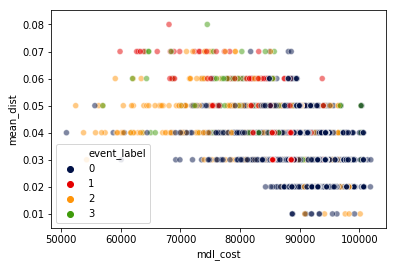

In [15]:
sns.scatterplot(x='mdl_cost', y='mean_dist', hue='event_label', data=motif_df, alpha=0.5,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

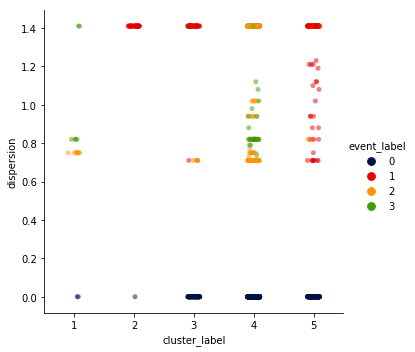

In [16]:
sns.catplot(x='cluster_label', y='dispersion', hue='event_label', data=motif_df, alpha=0.5, kind="strip",
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

In [18]:
cluster_pattern_list = [dic['pattern'] for i, dic in enumerate(motif_event_dic_list) if cluster_labels[i]==1]

In [19]:
cluster_pattern_list

[['gea'],
 ['gfb'],
 ['bgg', 'cgg'],
 ['cgg', 'egg', 'fgg'],
 ['cgg', 'egg', 'fgg', 'ggg'],
 ['bgg', 'cgg', 'egg', 'fgg', 'ggg'],
 ['cgg', 'egg', 'fgg', 'ggg', 'ggf'],
 ['bgg', 'cgg', 'egg', 'fgg', 'ggg', 'ggf'],
 ['ggg', 'ggf', 'gge', 'gfe', 'gfd', 'ged'],
 ['afg', 'bgg', 'cgg', 'egg', 'fgg', 'ggg'],
 ['fgg', 'ggg', 'ggf', 'gge', 'gfe', 'gfd', 'ged'],
 ['egg', 'fgg', 'ggg', 'ggf', 'gge', 'gfe', 'gfd'],
 ['afg', 'bgg', 'cgg', 'egg', 'fgg', 'ggg', 'ggf'],
 ['aeg', 'afg', 'bgg', 'cgg', 'egg', 'fgg', 'ggg'],
 ['egg', 'fgg', 'ggg', 'ggf', 'gge', 'gfe', 'gfd', 'ged'],
 ['aeg', 'afg', 'bgg', 'cgg', 'egg', 'fgg', 'ggg', 'ggf']]